# EDA

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'E:/alex/03_MACHINE_LEARNING/08_CASOS//03_SCORING RIESGOS'

Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [5]:
variables = ['antigüedad_empleo', 'ingresos_verificados', 'rating', 'vivienda',
       'finalidad', 'num_cuotas', 'estado']

In [6]:
def frecuencias_cat(df_cat):
    resultado = df_cat[variables].apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [7]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
9,antigüedad_empleo,9 years,0.035017
7,antigüedad_empleo,7 years,0.041251
8,antigüedad_empleo,8 years,0.041251
6,antigüedad_empleo,6 years,0.044487
4,antigüedad_empleo,4 years,0.060277
5,antigüedad_empleo,5 years,0.062585
11,antigüedad_empleo,desconocido,0.064994
0,antigüedad_empleo,1 year,0.065145
3,antigüedad_empleo,3 years,0.080454
10,antigüedad_empleo,< 1 year,0.084653


### Análisis gráfico

In [8]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 14, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        #plt.tight_layout();

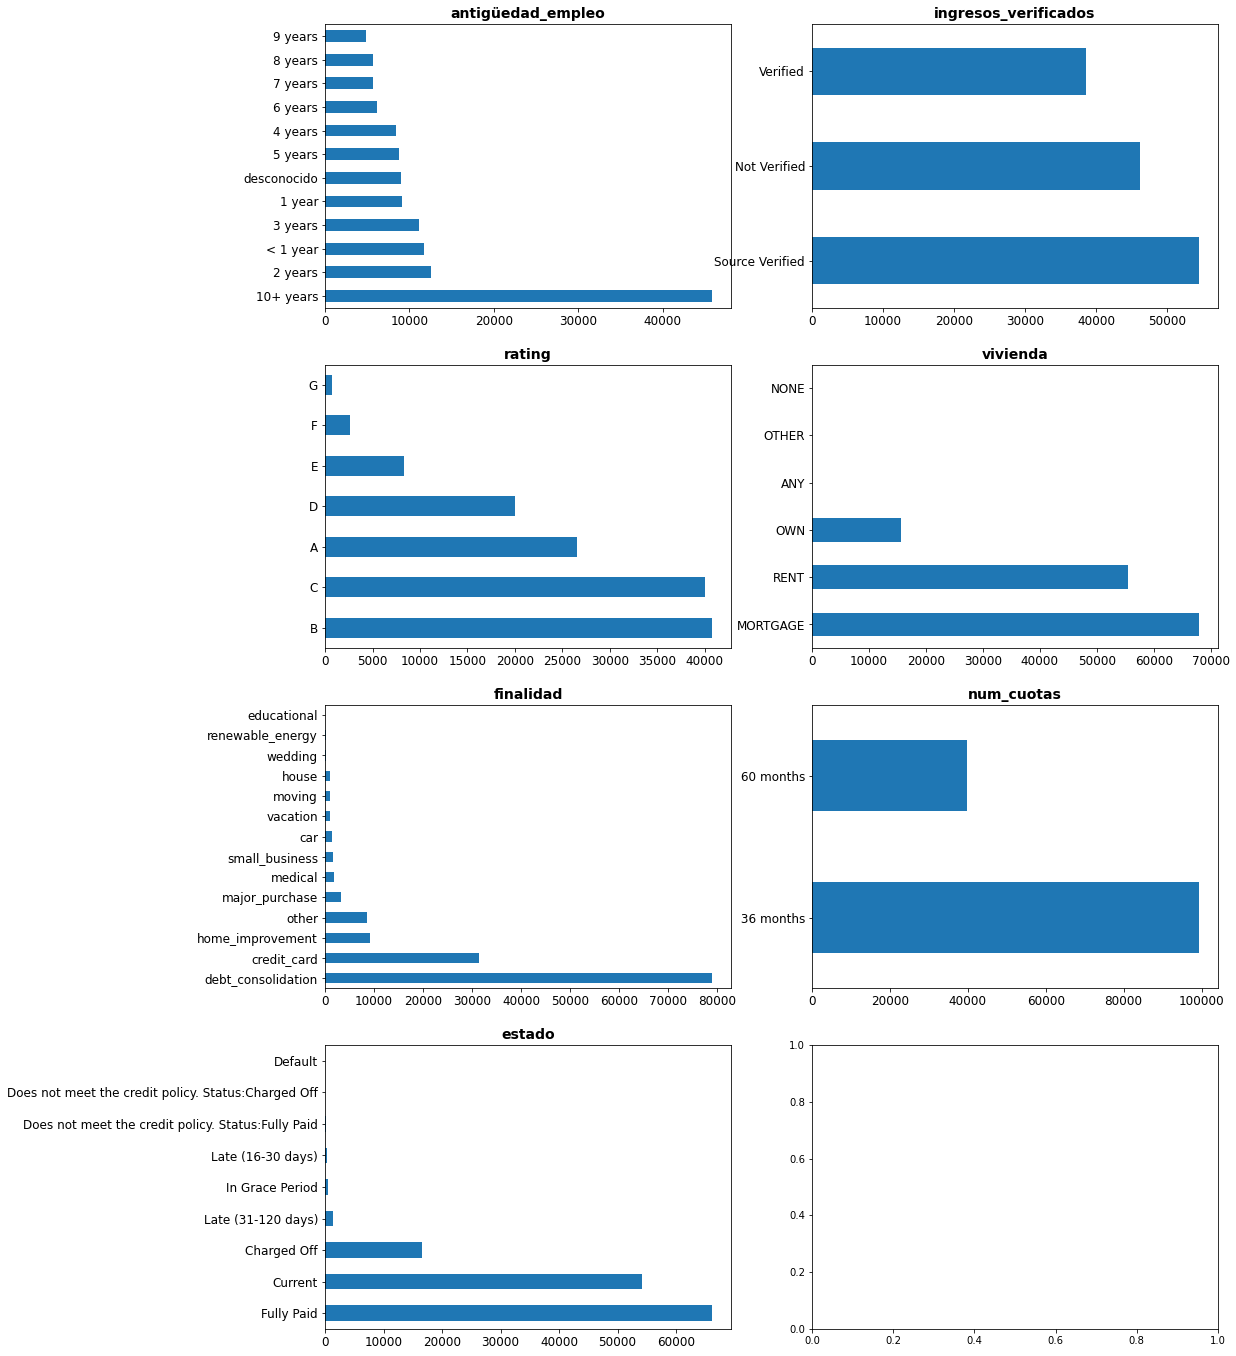

In [9]:
graficos_eda_categoricos(cat[variables])

Conclusiones:

En transformación:

* En vivienda juntar ANY, NONE y OTHER a la categoria mayoritaria
* En finalidad juntar renewable_energy, educational y wedding en 'otros'
* Crear la target a partir de estado

## EDA NUMÉRICAS

### Análisis estadístico

In [10]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [13]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
ingresos,139074.0,75092.557280,65000.00,42139.054648,0.00,46000.0000,65000.00,92000.00,300000.00
dti,139074.0,18.838128,17.84,13.745597,-1.00,12.0000,17.84,24.50,999.00
num_hipotecas,139074.0,1.506982,1.00,1.880054,0.00,0.0000,1.00,2.00,27.00
num_lineas_credito,139074.0,11.603506,11.00,5.634554,0.00,8.0000,11.00,14.00,91.00
porc_tarjetas_75p,139074.0,41.082371,33.30,36.467122,0.00,0.0000,33.30,66.70,100.00
porc_uso_revolving,139074.0,50.334161,50.30,24.697140,0.00,31.6000,50.30,69.30,366.60
num_cancelaciones_12meses,139074.0,0.008549,0.00,0.106210,0.00,0.0000,0.00,0.00,7.00
num_derogatorios,139074.0,0.197377,0.00,0.569073,0.00,0.0000,0.00,0.00,46.00
num_meses_desde_ult_retraso,139074.0,16.783310,0.00,23.015264,0.00,0.0000,0.00,30.00,195.00
principal,139074.0,14976.101931,12800.00,9125.690831,500.00,8000.0000,12800.00,20000.00,40000.00


### Análisis gráfico

In [14]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

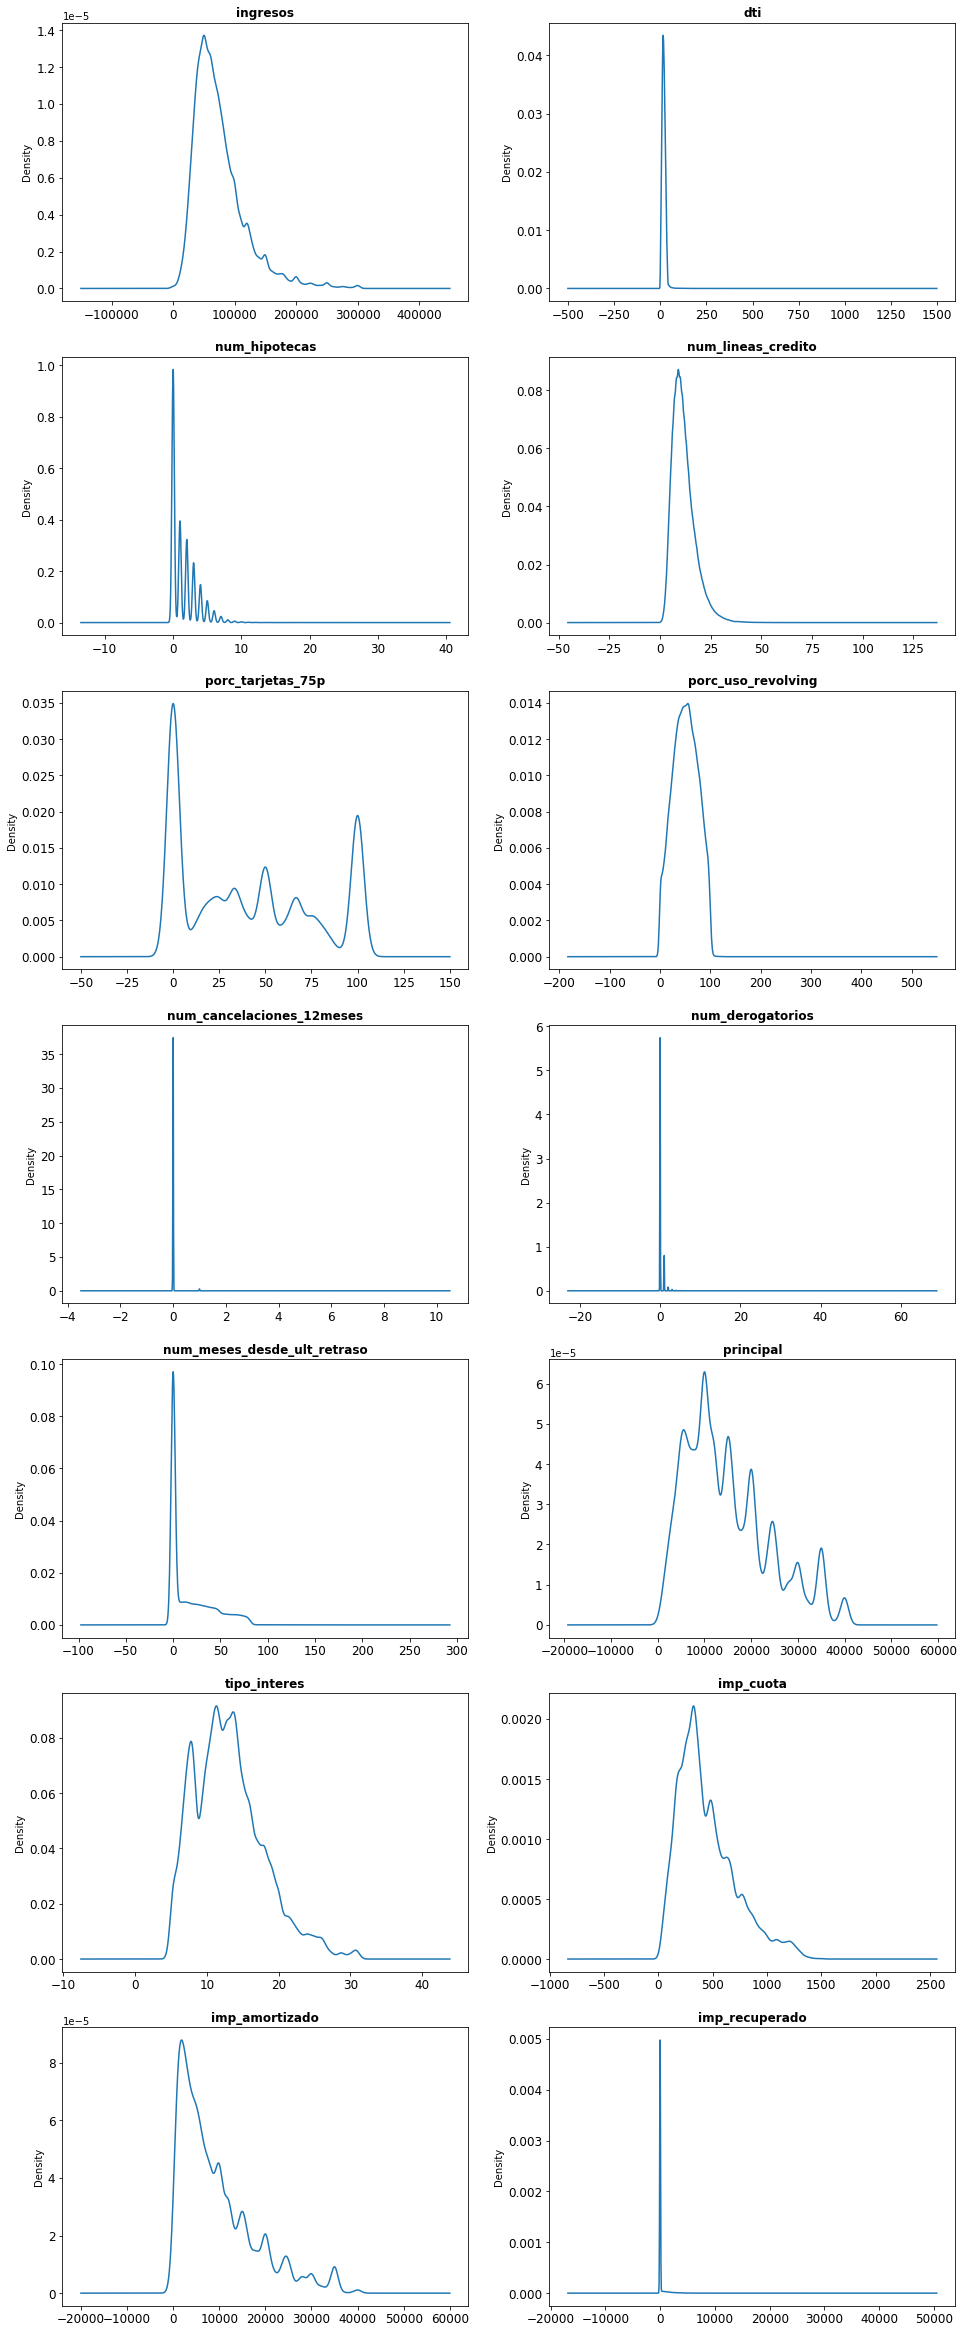

In [15]:
graficos_eda_continuas(num)

Vamos a analizar el detalle de imp_amortizado e imp_recuperado, ya que son relevantes para la target del modelo LGD.

In [16]:
ratios = num[['principal','imp_amortizado','imp_recuperado']].copy()

In [17]:
ratios['r_amortizado_principal'] = ratios.imp_amortizado / ratios.principal
ratios['r_recuperado_principal'] = ratios.imp_recuperado / ratios.principal

In [18]:
ratios.describe().T

,count,mean,std,min,25%,50%,75%,max
principal,139074.0,14976.101931,9125.690831,500.0,8000.000000,12800.000000,20000.0,40000.000000
imp_amortizado,139074.0,9454.392801,8252.270001,0.0,3005.617500,7000.000000,13650.0,40000.000000
imp_recuperado,139074.0,146.083137,769.723669,0.0,0.000000,0.000000,0.0,33666.340000
r_amortizado_principal,139074.0,0.661917,0.369154,0.0,0.274271,0.867173,1.0,1.000003
r_recuperado_principal,139074.0,0.009081,0.041819,0.0,0.000000,0.000000,0.0,1.220774


Conclusiones:

* En transformación convertir num_derogatorios a binaria
* Revisar en profundidad la relación entre estado e imp_recuperado

In [19]:
temp = cat[['estado']].merge(num[['imp_recuperado']], left_index=True, right_index=True)
temp.groupby('estado').imp_recuperado.mean()

estado
Charged Off                                            1226.888559
Current                                                   0.000000
Default                                                   0.000000
Does not meet the credit policy. Status:Charged Off     585.776545
Does not meet the credit policy. Status:Fully Paid        0.000000
Fully Paid                                                0.000000
In Grace Period                                           0.000000
Late (16-30 days)                                         0.000000
Late (31-120 days)                                        0.000000
Name: imp_recuperado, dtype: float64

Efectivamente sólo hay importe recuperado en el estado Charged Off.

## GUARDAR DATASETS TRAS EDA

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

In [24]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [25]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)